In [1]:
%matplotlib inline

import wikipedia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from IPython.display import Image

ImportError: No module named wikipedia

In [2]:
#because my version of pandas is different than the version that descriptions.pkl was created with
with open("descriptions.txt") as desc:
    descriptions = desc.readlines()
titles = []
descs = []
tempDesc = ''
for description in descriptions:
    if description[0].isnumeric():
        titles.append(description[4:-1])
    elif description == '\n':
        descs.append(tempDesc)
        tempDesc = ''
    else:
        tempDesc += description[:-1]
descs.append(tempDesc)

In [57]:
values = pd.read_csv("/Users/laura/SEMILAR-API-1.0/output_bleu.txt",header=None)

In [58]:
sims = np.zeros((144,144))

In [59]:
for i, row in values.iterrows():
    show1 = row[0]
    show2 = int(str(row[1])[:-1])
    sim = row[2]
    if(np.isnan(float(sim))):
        sim = 0
    sims[show1][show2] = sim
    sims[show2][show1] = sim

In [60]:
#MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
pos = mds.fit_transform(sims)
xs, ys = pos[:,0], pos[:,1]

In [61]:
#KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(pos)
labels = kmeans.labels_

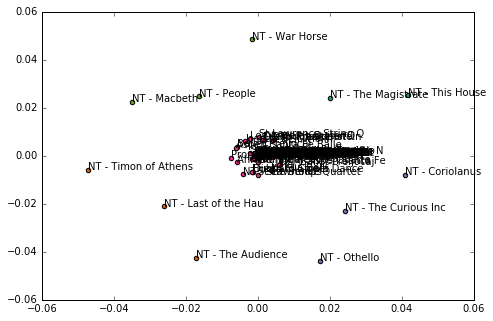

In [62]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

for i in range(5):
    cluster_x = []
    cluster_y = []
    for j in range(len(labels)):
        if labels[j] == i:
            cluster_x.append(cluster_x.append(xs[j]))
            cluster_y.append(cluster_y.append(ys[j]))
    plt.scatter(cluster_x, cluster_y, c=cluster_colors[i], s=20)

for i, txt in enumerate(titles):
    ax.annotate(txt, (xs[i],ys[i]))
    
plt.savefig('cluster_viz_bleu.png', dpi=200)

In [56]:
for i in range(5):
    print("cluster ",i)
    for j in range(len(labels)):
        if labels[j] == i:
            print(titles[j])
    print("*****")

cluster  0
New York Philharmoni
Artemis Quartet
Audra McDonald
St Petersburg Philha
Denis Matsuev, piano
Hagen Quartet
Aspen Santa Fe Balle
Ragamala Dance
Emerson String Quart
Mark Morris Dance Gr
Sweet Honey In The R
JLCO with Wynton
Angelique Kidjo
Kronos Quartet
1927: The Animals an
NT - Othello
Compagnie Kafig
NT - She Stoops
Chanticleer
St Lawrence String Q
Brahms's Requiem
NT - The Kitchen
NT - This House
NT - Coriolanus
*****
cluster  1
Ballet Preljocaj
Detroit Symphony Orc
Anne-Sophie Mutter, 
Kremerata Baltica
Propeller: Twelfth N
St Lawrence Quartet
NT - The Audience
Stile Antico
The Silk Road Ensemb
New Century Chamber
Goran Bregovic
Cloud Gate Dance The
Diego El Cigala
AnDa Union
Amjad Ali Khan
Ukulele Orchestra of
Dianne Reeves Quarte
Sabine Meyer
Berlin Philharmonic
NT - Macbeth
Dave Holland
One Night in Bamako
NT - The Curious Inc
FAM -Aspen Santa Fe
James Blake
*****
cluster  2
Yuja Wang, piano
San Francisco Sympho
Pavel Haas Quartet
Mariinsky Orchestra
Alison Balsom
An

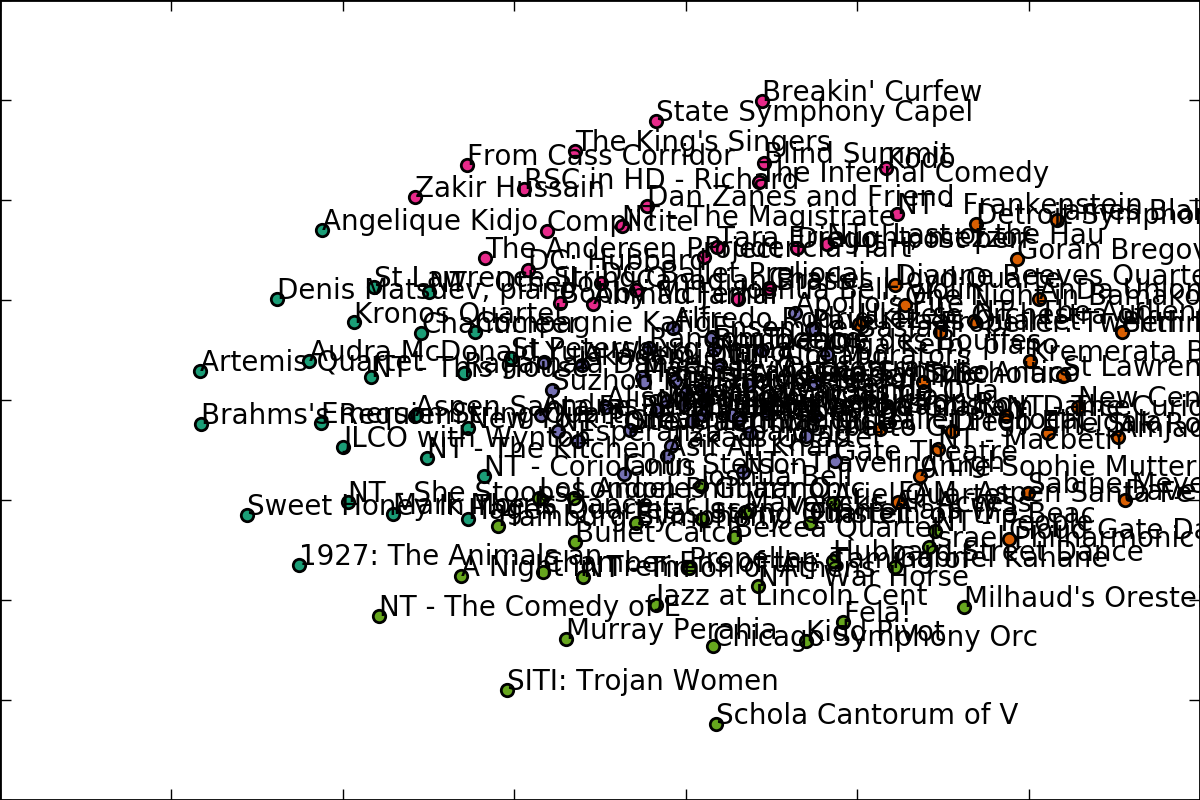

In [55]:
Image(filename='cluster_viz_cm.png')